# Rename later
This notebook aims to classify the quality of red wine using various parameters or features. This will be a classification problem and will try to use various classification models to find best accuracy score.

In [1]:
# insert about the data here

In [249]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [250]:
#Acquire the data
df = pd.read_csv("winequality-red.csv")


In [251]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [252]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [254]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [255]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
7.2            0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
9.3            0.360             0.39         1.5             0.080      41.0                 55.0                  0.99652  3.47  0.73       10.9     6          3
                     

In [256]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [257]:
#preparation
def missing_zero_values_table(df):
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
              "There are " +  str((mz_table['null_count'] != 0).sum()) +
              " columns that have NULL values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table

In [258]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
missing_values = missing_zero_values_table(df)
missing_values

Your selected dataframe has 12 columns and 1599 Rows.
There are 0 columns that have NULL values.


Zero Values  null_count  % of Total Values  \
fixed acidity                   0           0                0.0   
volatile acidity                0           0                0.0   
citric acid                   132           0                0.0   
residual sugar                  0           0                0.0   
chlorides                       0           0                0.0   
free sulfur dioxide             0           0                0.0   
total sulfur dioxide            0           0                0.0   
density                         0           0                0.0   
pH                              0           0                0.0   
sulphates                       0           0                0.0   
alcohol                         0           0                0.0   
quality                         0           0                0.0   

                      Total Zeroes + Null Values  % Total Zero + Null Values  \
fixed acidity                                  0                         0.0   
volatile acidity                               0                         0.0   
citric acid                                  132                         8.3   
residual sugar                                 0                         0.0   
chlorides                                      0                         0.0   
free sulfur dioxide                            0                         0.0   
total sulfur dioxide                           0                         0.0   
density                                        0                         0.0   
pH                                             0                         0.0   
sulphates                                      0                         0.0   
alcohol                                        0                         0.0   
quality                                        0                         0.0   

                     Data Type  
fixed acidity          float64  
volatile acidity       float64  
citric acid            float64  
residual sugar         float64  
chlorides              float64  
free sulfur dioxide    float64  
total sulfur dioxide   float64  
density                float64  
pH                     float64  
sulphates              float64  
alcohol                float64  
quality                  int64

In [259]:
missing_values = missing_values[['null_count','% of Total Values']]

In [260]:
#drop columns with greater than 20% null
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values)

                      null_count  % of Total Values
fixed acidity                  0                0.0
volatile acidity               0                0.0
citric acid                    0                0.0
residual sugar                 0                0.0
chlorides                      0                0.0
free sulfur dioxide            0                0.0
total sulfur dioxide           0                0.0
density                        0                0.0
pH                             0                0.0
sulphates                      0                0.0
alcohol                        0                0.0
quality                        0                0.0


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [262]:
def handle_missing_values(df, prop_required_row = 0.75, prop_required_col = 0.75):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df = df.dropna(axis = 1, thresh = threshold)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df = df.dropna(axis = 0, thresh = threshold)
    
    
    return df

In [263]:
df['quality'].value_counts()



5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [264]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<AxesSubplot:>

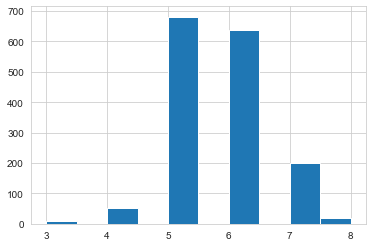

In [265]:
df.quality.hist()

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [267]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

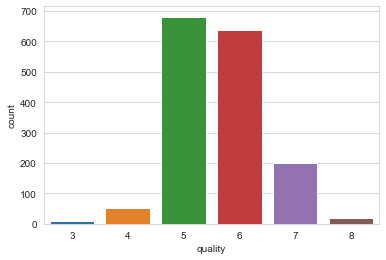

In [268]:
sns.countplot(x='quality',data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

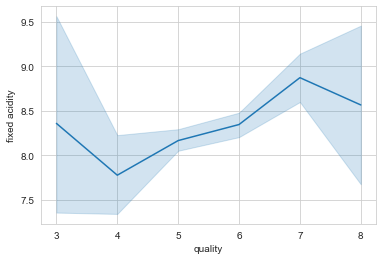

In [269]:
sns.set_style('whitegrid')
sns.lineplot(data=df, x="quality", y="fixed acidity")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

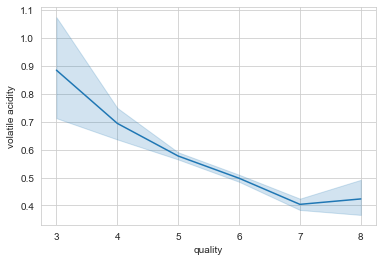

In [270]:
sns.set_style('whitegrid')
sns.lineplot(x = 'quality', y = 'volatile acidity', data = df)

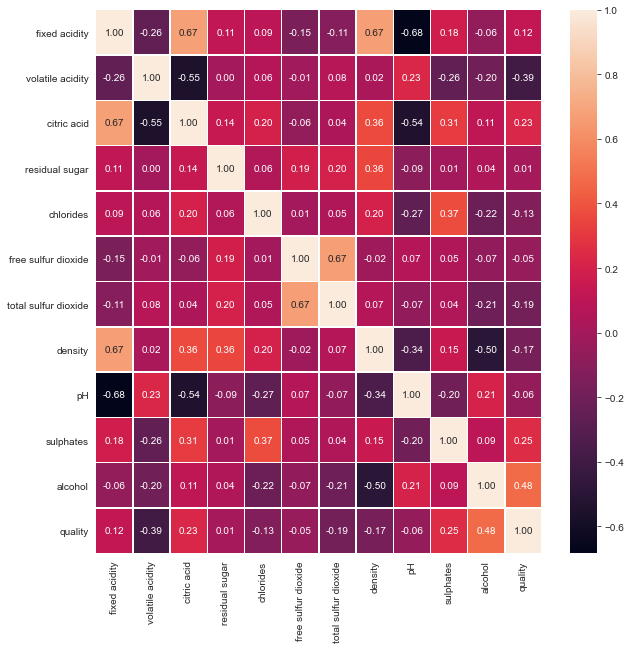

In [271]:
#correlation map view
df.corr() 
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = ".2f", ax=ax)
plt.show()

In [272]:
#Takeaways here

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

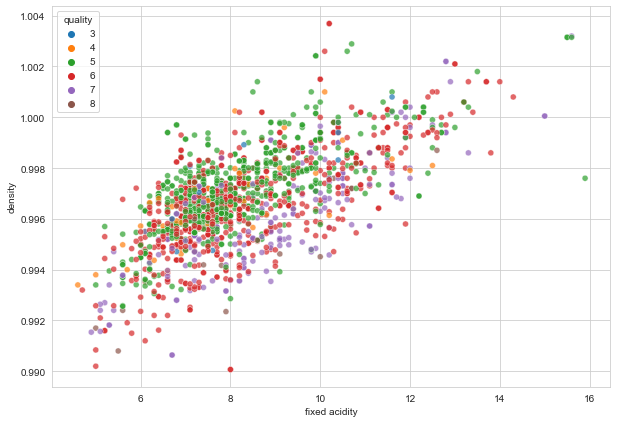

In [276]:
#scatter plot 
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='volatile acidity', ylabel='density'>

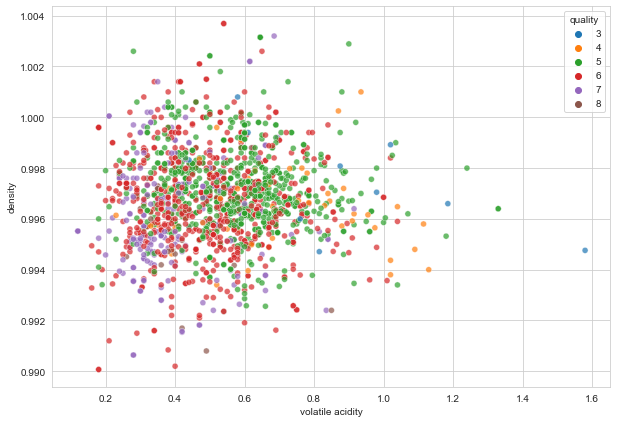

In [275]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "volatile acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='citric acid', ylabel='density'>

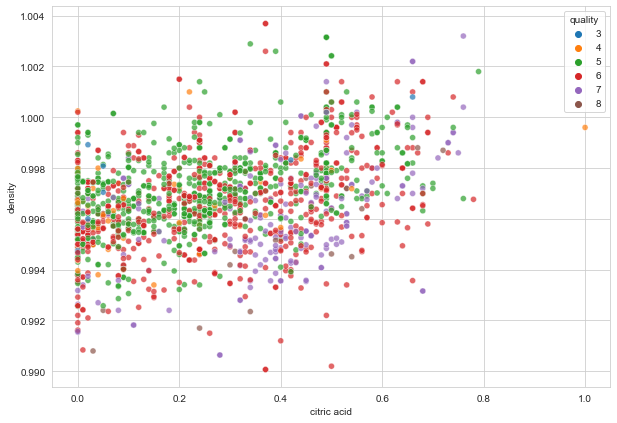

In [277]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "citric acid", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

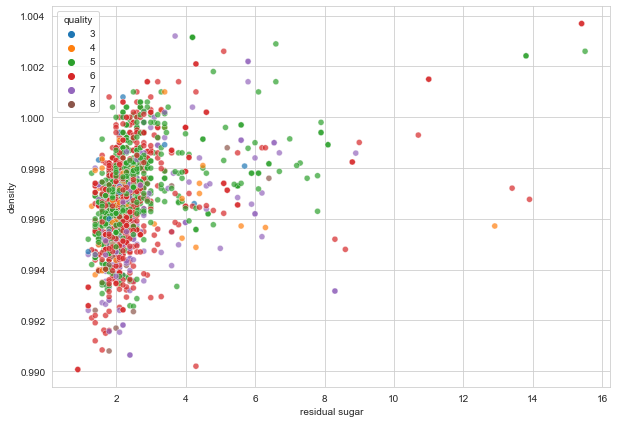

In [278]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "residual sugar", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='chlorides', ylabel='density'>

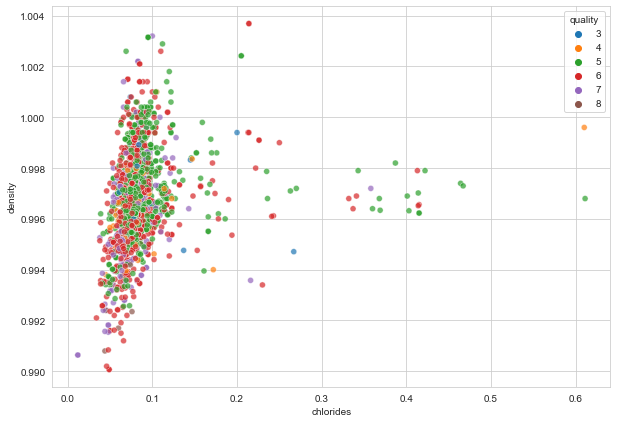

In [283]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "chlorides", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='density'>

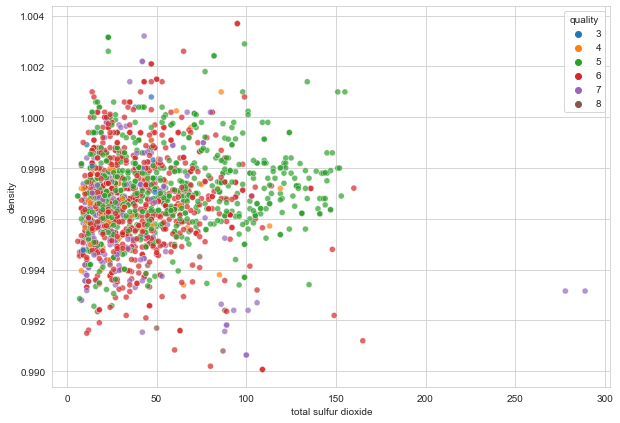

In [284]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "total sulfur dioxide", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

In [ ]:
free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality    

<AxesSubplot:xlabel='density', ylabel='density'>

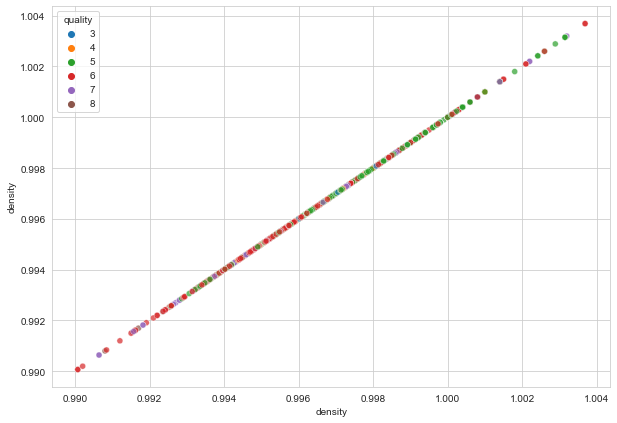

In [285]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "density", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='pH', ylabel='density'>

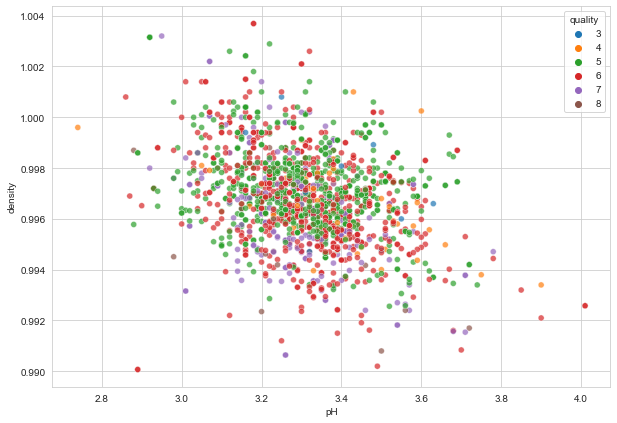

In [287]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "pH", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='sulphates', ylabel='density'>

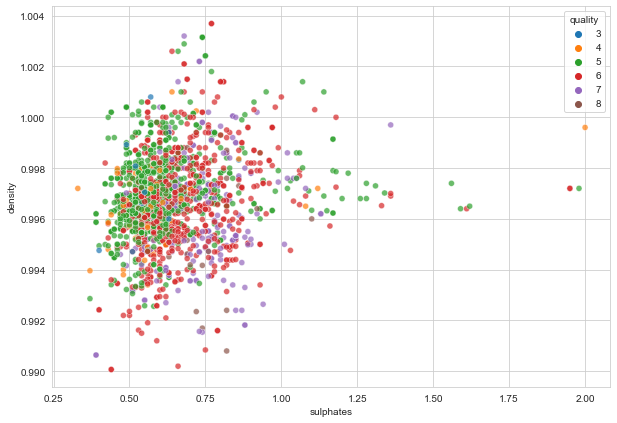

In [288]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "sulphates", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

<AxesSubplot:xlabel='alcohol', ylabel='density'>

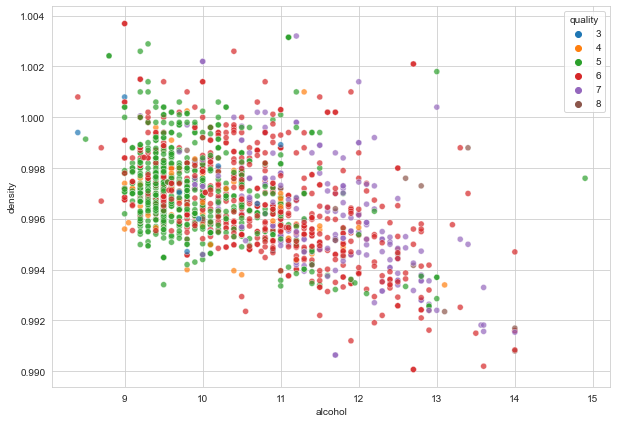

In [289]:
plt.figure(figsize = (10 , 7))
sns.scatterplot(x = "alcohol", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "tab10")

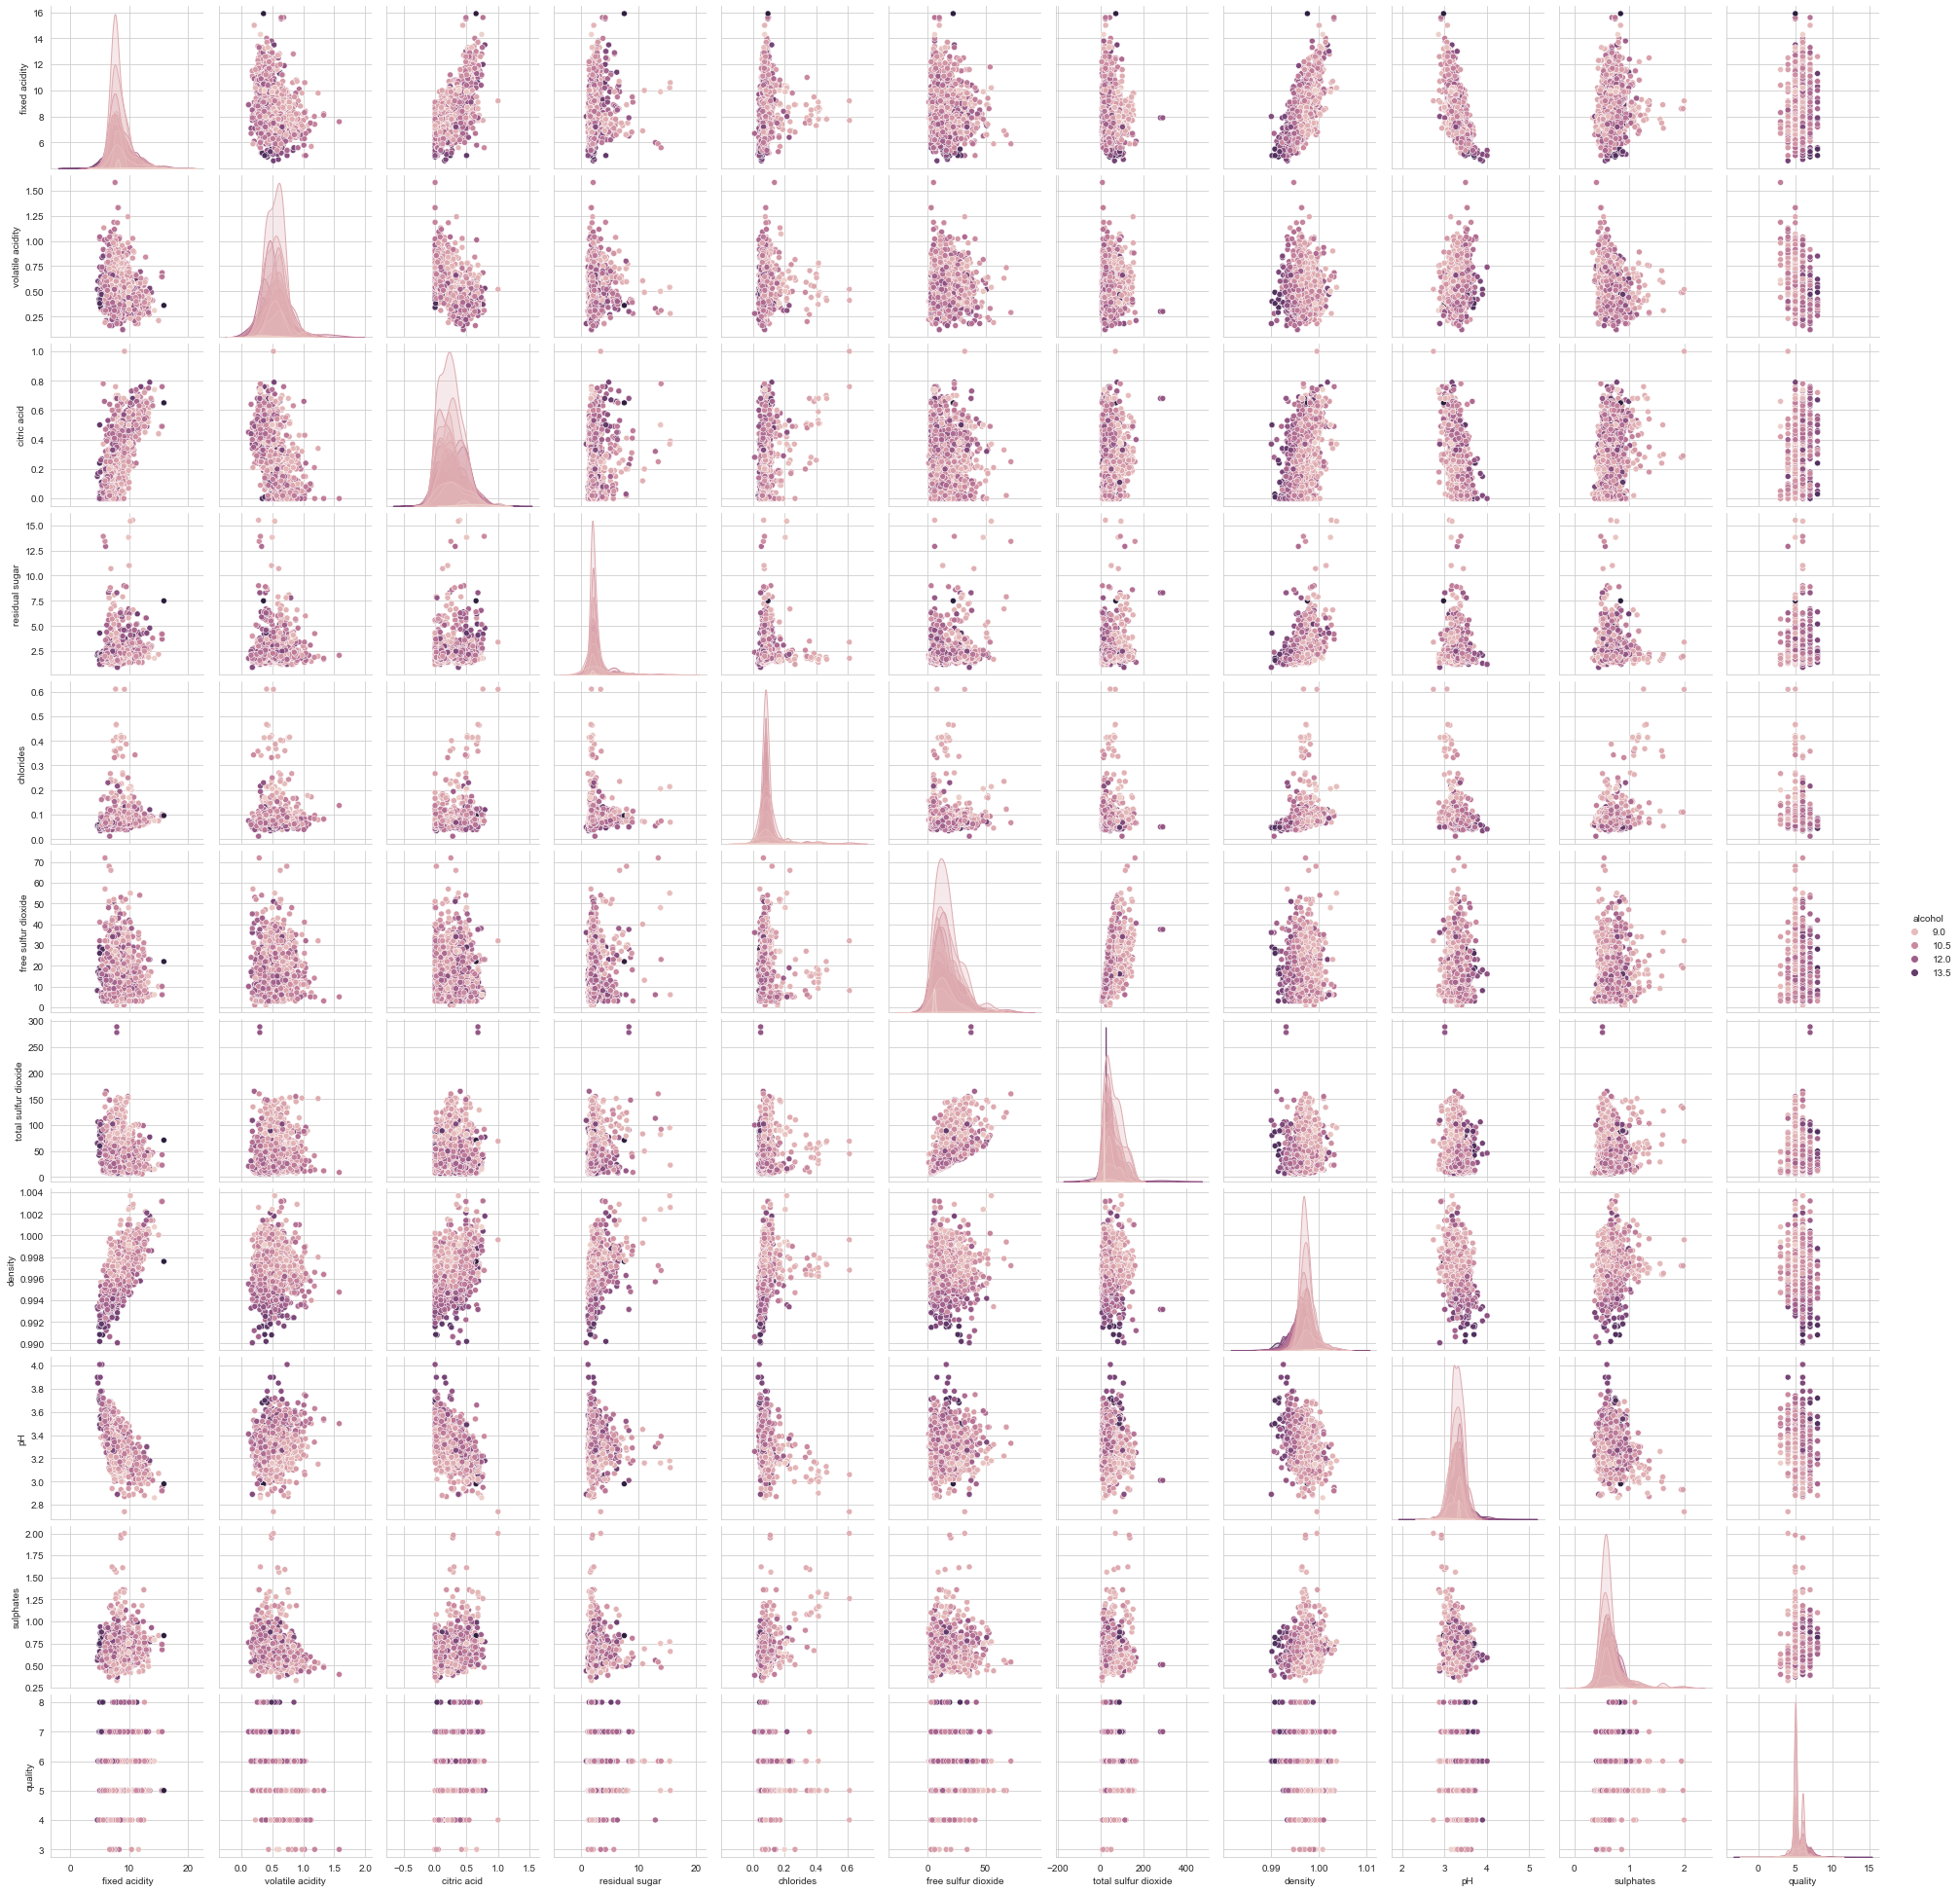

In [290]:
sns.pairplot(df, hue="alcohol")

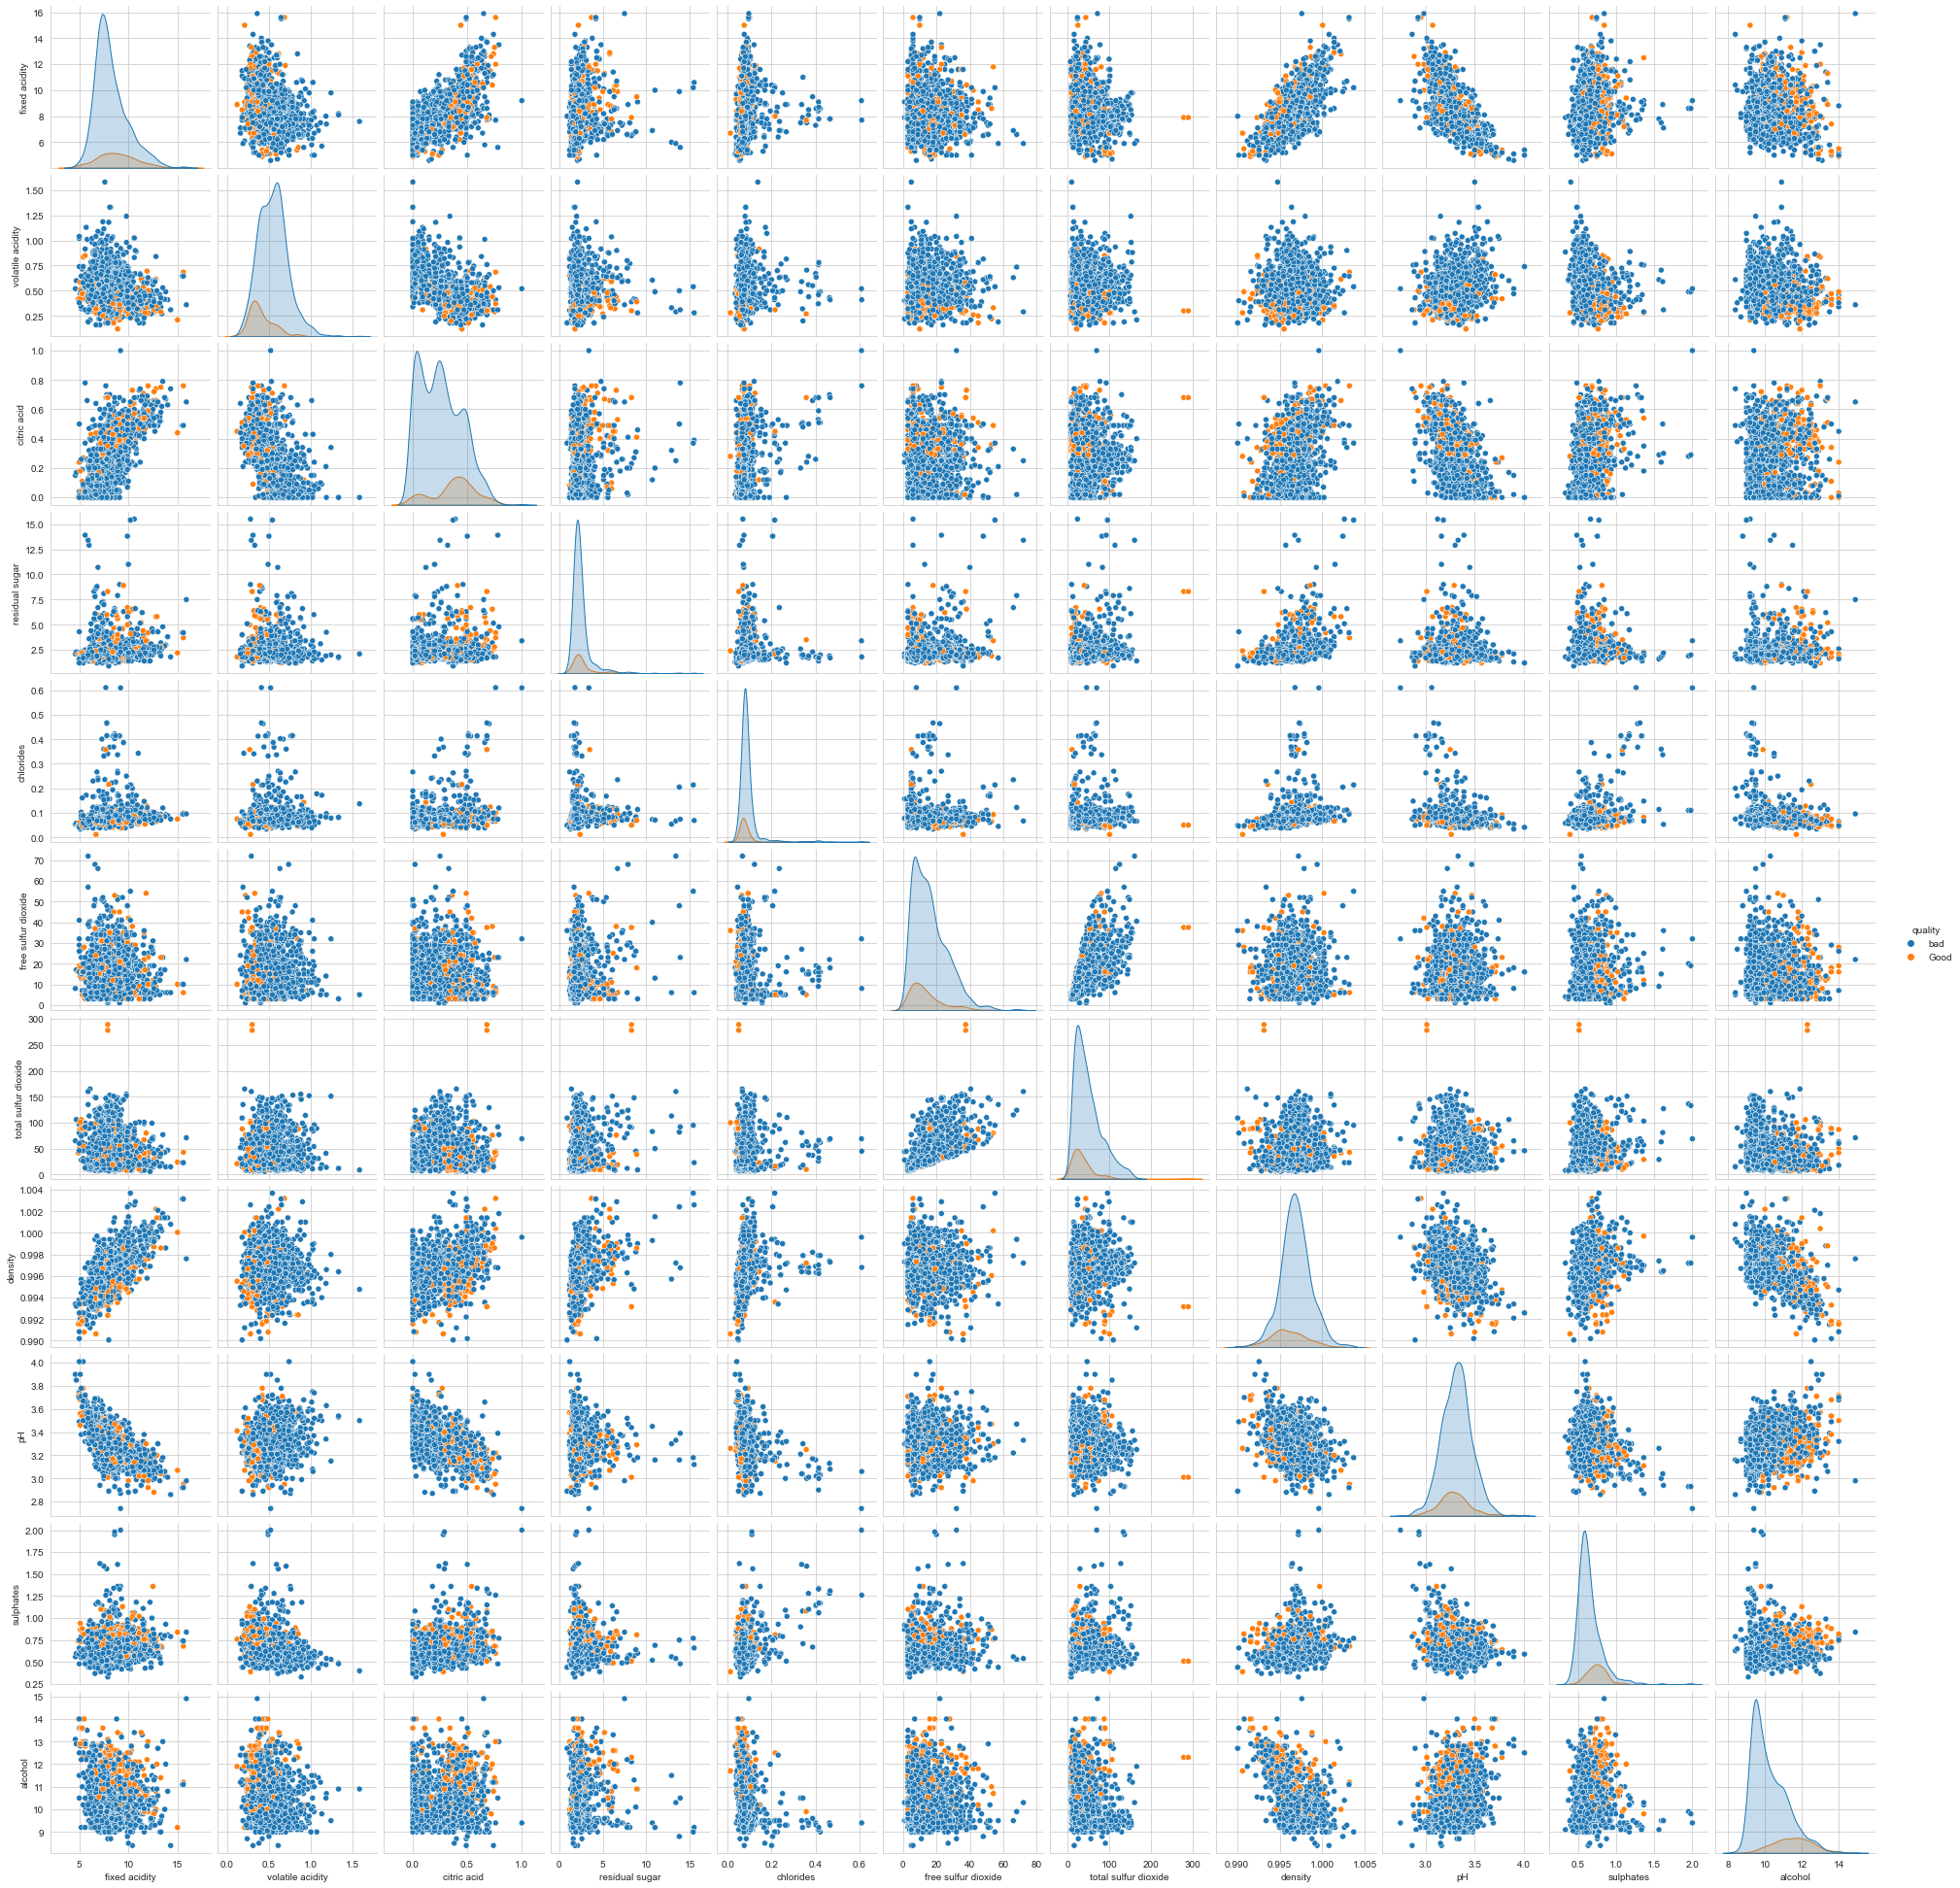

In [205]:
sns.pairplot(df, hue="quality")

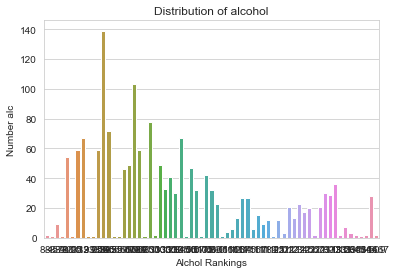

In [292]:
#How many wine quality number is realted with how many unique wines
#print(data['quality'].value_counts())
sns.barplot(df['alcohol'].unique(),df['alcohol'].value_counts())
plt.xlabel("Alchol Rankings")
plt.ylabel("Number alc")
plt.title("Distribution of alcohol")
plt.show()

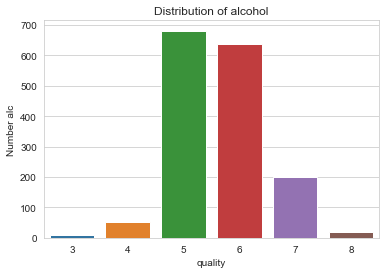

In [295]:
sns.barplot(df['quality'].unique(),df['quality'].value_counts())
plt.xlabel("quality")
plt.ylabel("Number alc")
plt.title("Distribution of alcohol")
plt.show()

In [296]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


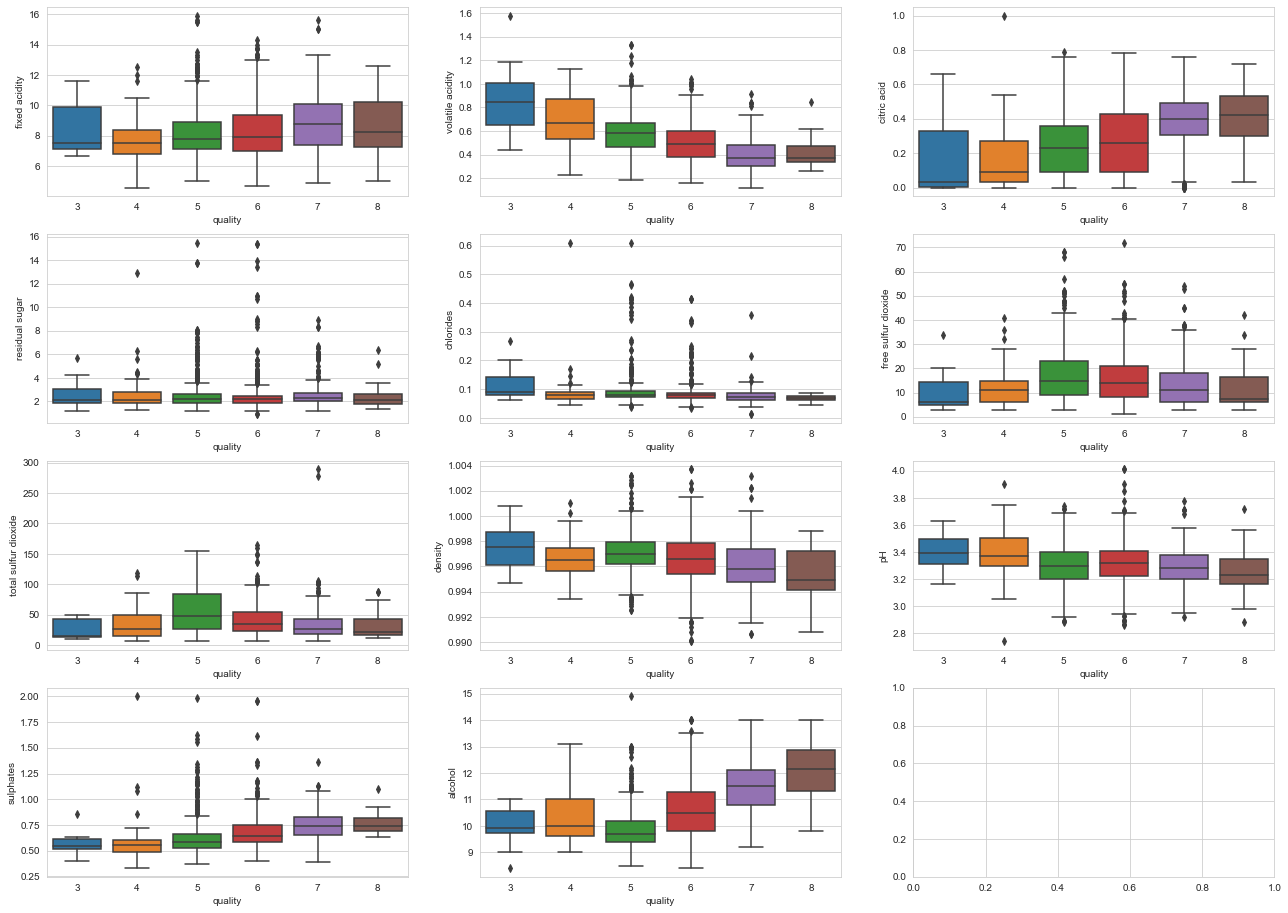

In [297]:
fig, ax1 = plt.subplots(4,3, figsize=(22,16))
k = 0
for i in range(4):
    for j in range(3):
        if k != 11:
            sns.boxplot('quality',df.iloc[:,k], data=df, ax = ax1[i][j])
            k += 1
plt.show()

In [ ]:
# Hypothesis testing?
# higher alcohol = better wine quality?

In [298]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [299]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='quality', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['quality'])
y_train = train.quality

X_validate = validate.drop(columns=['quality'])
y_validate = validate.quality

X_test = test.drop(columns=['quality'])
y_test = test.quality

In [300]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [301]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)


In [302]:
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [303]:
#Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.0280017  0.14303988 0.04699769 0.00754663 0.03851064 0.01387225
 0.12306677 0.07288004 0.01928912 0.15620572 0.35058955]


In [304]:
y_pred = rf.predict(X_train)

In [305]:
y_pred_proba = rf.predict_proba(X_train)

In [306]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.62


In [307]:
print(confusion_matrix(y_train, y_pred))

[[  0   0   4   2   0   0]
 [  0   0  18  11   0   0]
 [  0   0 308  73   0   0]
 [  0   0 113 244   0   0]
 [  0   0   9 102   0   0]
 [  0   0   0  11   0   0]]


In [308]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        29
           5       0.68      0.81      0.74       381
           6       0.55      0.68      0.61       357
           7       0.00      0.00      0.00       111
           8       0.00      0.00      0.00        11

    accuracy                           0.62       895
   macro avg       0.21      0.25      0.22       895
weighted avg       0.51      0.62      0.56       895



In [309]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.59
